In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string
import re
import tensorflow as tf
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:

pd.set_option("display.max_colwidth", 100)
data = pd.read_csv(r"/content/combined_emotion.csv")
data.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last f...,sad
2,i gave up my internship with the dmrg and am feeling distraught,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the universit...,fear


In [4]:
# Assigning the values
X = data['sentence']
y = data['emotion']

In [5]:
# Cleaning the text
stopword = nltk.corpus.stopwords.words("english")
ps =  WordNetLemmatizer()
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.lemmatize(word) for word in tokens if word not in stopword]
    return text


In [6]:
#Apply Vectorizatin

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X = tfidf_vect.fit_transform(X)


In [7]:
# Spliting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 0)

In [8]:
X_train.shape

(338196, 67688)

In [19]:
# Training the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)




LogisticRegression(max_iter=500)

In [10]:
# Make a prediction
y_pred = model.predict(X_test)
y_pred

array(['fear', 'joy', 'fear', ..., 'sad', 'joy', 'joy'], dtype=object)

In [11]:
# Printing the accuracy and classification
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.8946658781785926
Classification Report:                precision    recall  f1-score   support

       anger       0.90      0.90      0.90     12026
        fear       0.84      0.84      0.84      9790
         joy       0.91      0.93      0.92     28662
        love       0.80      0.75      0.77      7003
         sad       0.93      0.94      0.94     24032
     suprise       0.77      0.68      0.72      3037

    accuracy                           0.89     84550
   macro avg       0.86      0.84      0.85     84550
weighted avg       0.89      0.89      0.89     84550



In [12]:
# Example Prediction
example_sentences = ["I feel so anxious and afraid", "I am incredibly happy with my progress", "I am so angry with you."]
example_tfidf = tfidf_vect.transform(example_sentences)
predictions = model.predict(example_tfidf)

for sentence, emotion in zip(example_sentences, predictions):
    print(f"Sentence: '{sentence}' --> Predicted Emotion: {emotion}")

Sentence: 'I feel so anxious and afraid' --> Predicted Emotion: fear
Sentence: 'I am incredibly happy with my progress' --> Predicted Emotion: joy
Sentence: 'I am so angry with you.' --> Predicted Emotion: anger


In [15]:
# Input text from the user
text_1 = input("Enter a text: ")

# Wrap the input in a list before transforming
text_1_transformed = tfidf_vect.transform([text_1])

# Predict using a trained model (replace 'model' with your actual trained model)
pred_1 = model.predict(text_1_transformed)

# Assuming the model outputs an array of predictions
for sentence, emotion in zip([text_1], pred_1):
    print(f"Text: {sentence}, \n Predicted Emotion: {emotion}")

Enter a text: Seeing my dog’s wagging tail makes me happy. It’s his Happiness Indicator and if I’m honest, I wish I had one!
Text: Seeing my dog’s wagging tail makes me happy. It’s his Happiness Indicator and if I’m honest, I wish I had one!, 
 Predicted Emotion: joy


In [18]:
# Input text from the user
text_1 = input("Enter a text: ")

# Wrap the input in a list before transforming
text_1_transformed = tfidf_vect.transform([text_1])

# Predict using a trained model (replace 'model' with your actual trained model)
pred_1 = model.predict(text_1_transformed)

# Assuming the model outputs an array of predictions
for sentence, emotion in zip([text_1], pred_1):
    print(f"Text:{sentence}. \n Predicted Emotion: {emotion}")

Enter a text:  Am really angry and I wish I could express it 
Text: Am really angry and I wish I could express it . 
 Predicted Emotion: anger


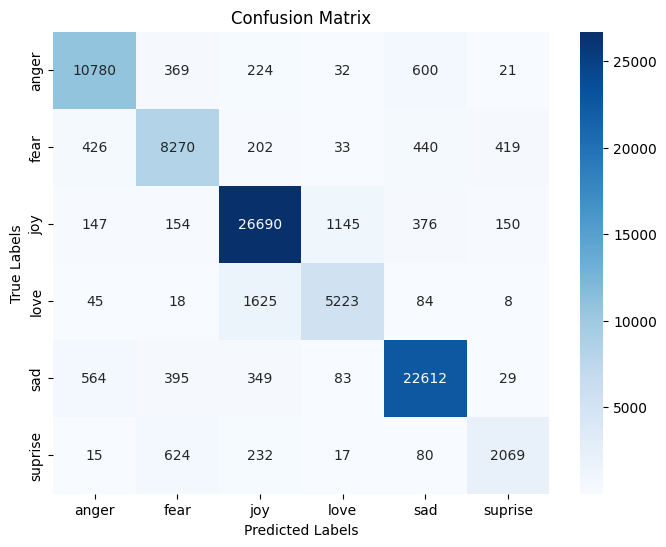

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

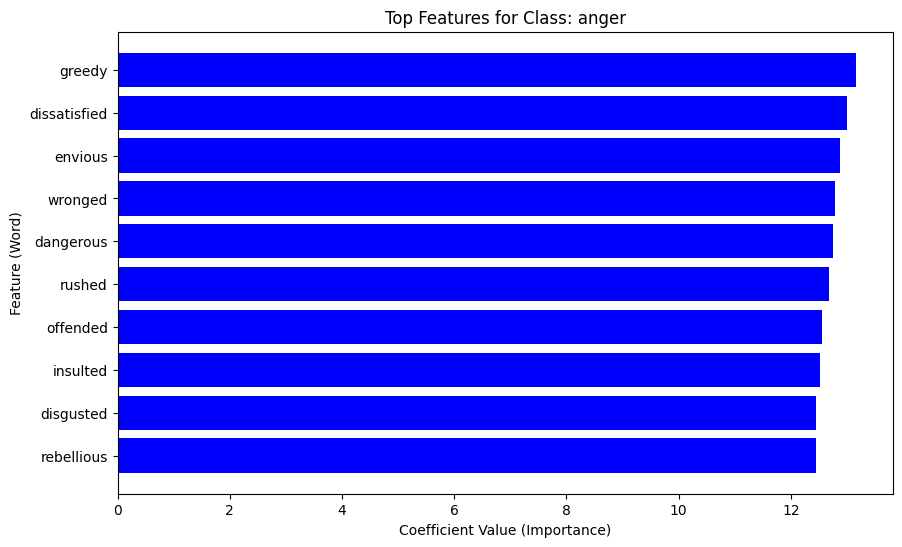

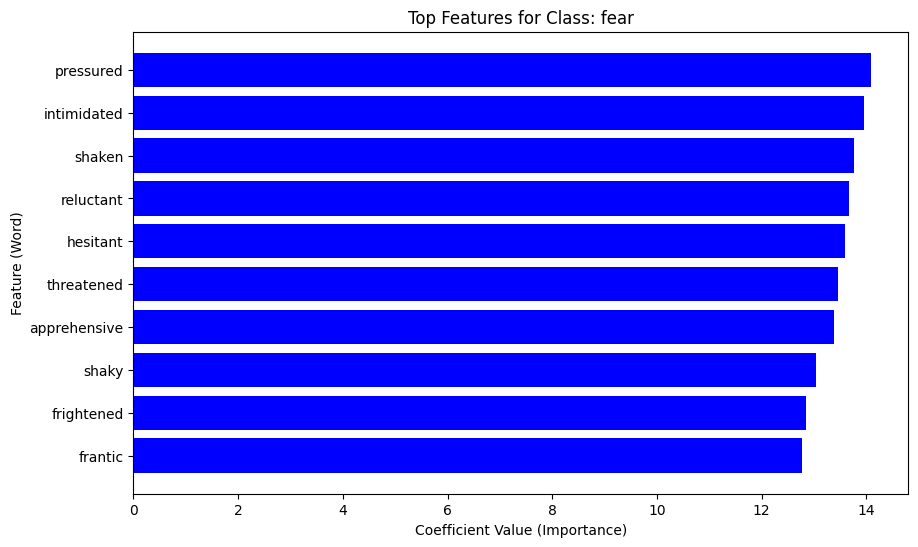

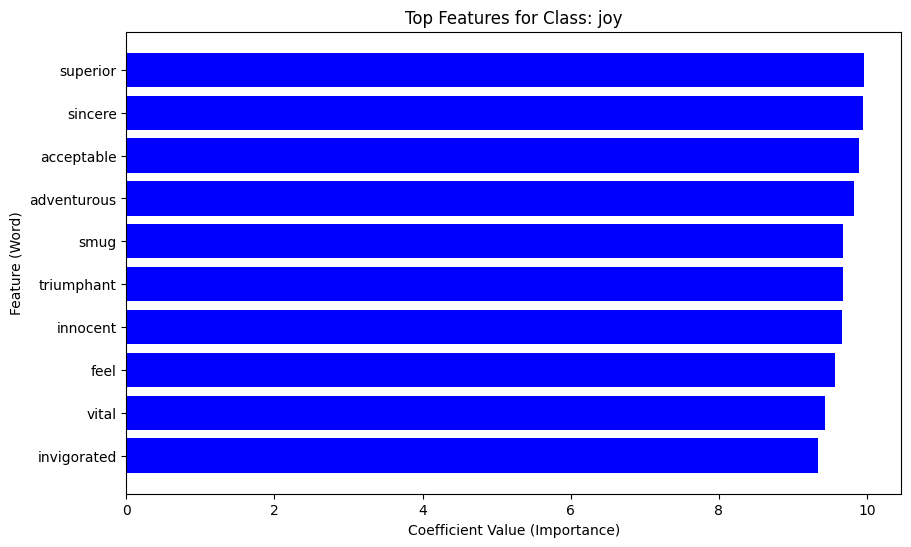

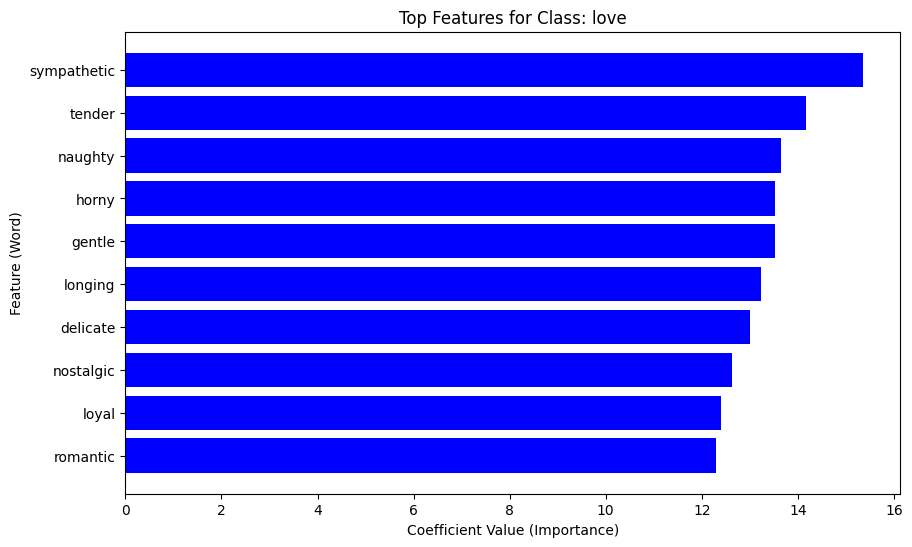

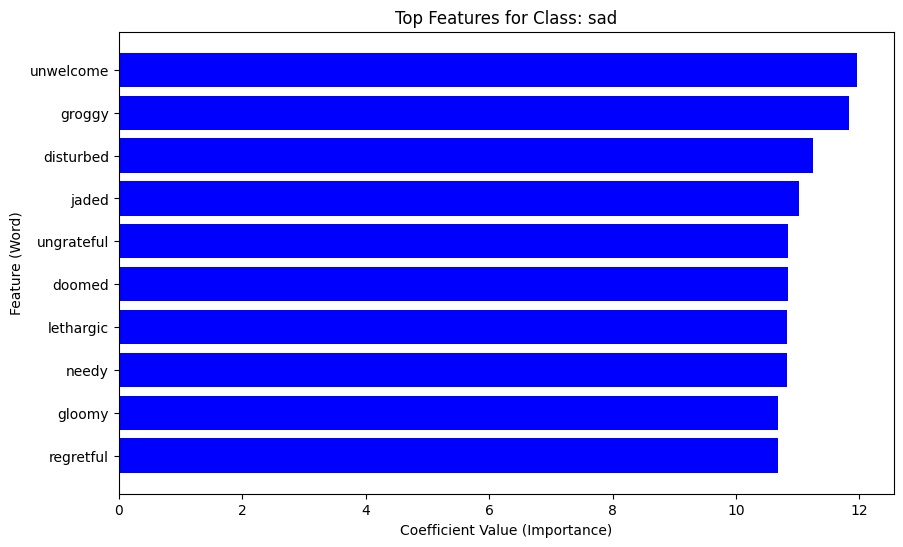

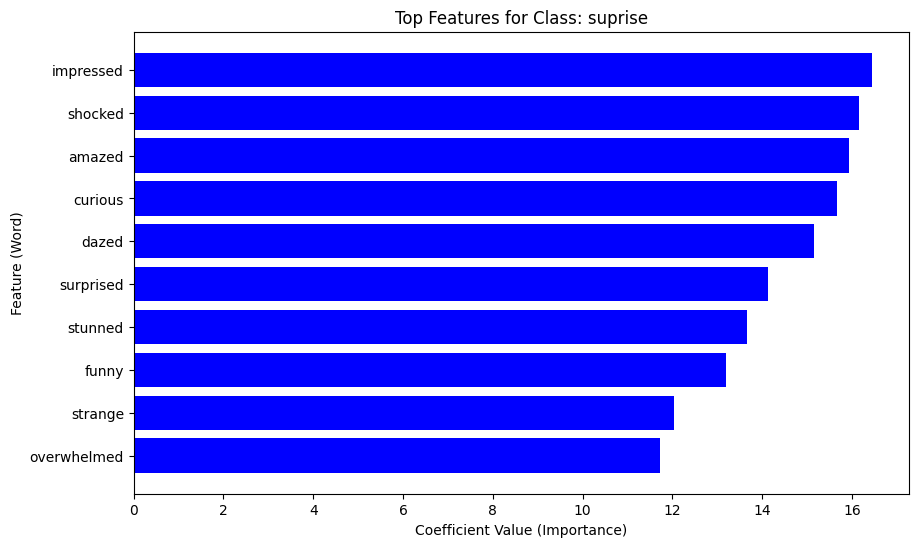

In [22]:
import numpy as np
feature_names = tfidf_vect.get_feature_names_out()  # Get the feature (word) names
coefficients = model.coef_  # Get coefficients for each class
classes = model.classes_  # Get class labels

# Plot feature importance for each class
for i, class_label in enumerate(classes):
    top_features_idx = np.argsort(coefficients[i])[-10:]  # Top 10 features for this class
    top_features = feature_names[top_features_idx]
    top_coefficients = coefficients[i][top_features_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_coefficients, color='blue')
    plt.title(f"Top Features for Class: {class_label}")
    plt.xlabel("Coefficient Value (Importance)")
    plt.ylabel("Feature (Word)")
    plt.show()

In [26]:
# Hamza khan
# Email: hamza.khan6093@gmail.com
# LinkedIn: https://www.linkedin.com/in/m-hamza-khan-/

